In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('data_set.csv')
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [3]:
titles = list(data.columns)
titles

['Timestamp',
 '1. What is your age?',
 '2. Gender',
 '3. Relationship Status',
 '4. Occupation Status',
 '5. What type of organizations are you affiliated with?',
 '6. Do you use social media?',
 '7. What social media platforms do you commonly use?',
 '8. What is the average time you spend on social media every day?',
 '9. How often do you find yourself using Social media without a specific purpose?',
 '10. How often do you get distracted by Social media when you are busy doing something?',
 "11. Do you feel restless if you haven't used Social media in a while?",
 '12. On a scale of 1 to 5, how easily distracted are you?',
 '13. On a scale of 1 to 5, how much are you bothered by worries?',
 '14. Do you find it difficult to concentrate on things?',
 '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?',
 '16. Following the previous question, how do you feel about these comparisons, generally speaking?',
 '17. How often do

#### Renaming Columns 

In [4]:
data.rename(columns = {'1. What is your age?':'Age',
                       '2. Gender':'Sex',
                       '3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Time Spent',
                       '9. How often do you find yourself using Social media without a specific purpose?':'Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Q3',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'Target 1',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Q5',
                       '14. Do you find it difficult to concentrate on things?':'Target 2',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Q7',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Q8',
                       '17. How often do you look to seek validation from features of social media?':'Q4',
                       '18. How often do you feel depressed or down?':'Q6',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Target 3',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'sleep' },inplace=True)

In [5]:
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'Q1',
 'Q2',
 'Q3',
 'Target 1',
 'Q5',
 'Target 2',
 'Q7',
 'Q8',
 'Q4',
 'Q6',
 'Target 3',
 'sleep']

In [6]:
data.drop(data.columns[-1], axis=1, inplace=True)  # drop the last column(sleep), which is not needed for our analysis

titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'Q1',
 'Q2',
 'Q3',
 'Target 1',
 'Q5',
 'Target 2',
 'Q7',
 'Q8',
 'Q4',
 'Q6',
 'Target 3']

In [7]:
# Swap the positions of 'Target 1' and 'Target 2'
titles[12], titles[17] = titles[17], titles[12]

# Swap the positions of 'Target 1' and 'Target 3'
titles[14], titles[18] = titles[18], titles[14]

data = data[titles]
titles

['Timestamp',
 'Age',
 'Sex',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Time Spent',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Target 1',
 'Target 2',
 'Target 3']

In [8]:
data.head()

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target 1,Target 2,Target 3
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,2,2,5,2,3,5,5,4
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,1,5,5,5,1,4,4,4
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,1,5,4,3,3,2,4,2
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,2,5,4,5,1,3,3,3
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,3,5,4,3,3,4,5,4


#### Missing Value Detection and Treatment

In [9]:
# Check number of records in each column of the data set. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            481 non-null    object 
 1   Age                  481 non-null    float64
 2   Sex                  481 non-null    object 
 3   Relationship Status  481 non-null    object 
 4   Occupation           481 non-null    object 
 5   Affiliations         451 non-null    object 
 6   Social Media User?   481 non-null    object 
 7   Platforms Used       481 non-null    object 
 8   Time Spent           481 non-null    object 
 9   Q1                   481 non-null    int64  
 10  Q2                   481 non-null    int64  
 11  Q3                   481 non-null    int64  
 12  Q4                   481 non-null    int64  
 13  Q5                   481 non-null    int64  
 14  Q6                   481 non-null    int64  
 15  Q7                   481 non-null    int

There are no missing values as expected

#### Data Transformation

Gender

In [10]:
#List all the unique Gender/Sex entries.

Genders = set(data['Sex'])
print(Genders)

{'Non binary ', 'There are others???', 'Male', 'unsure ', 'Female', 'Nonbinary ', 'Trans', 'Non-binary', 'NB'}


Responses stating "There are others???" will be disregarded as they indicate a lack of seriousness in completing the questionnaire. Therefore, entries containing this response will be excluded from consideration.

In [11]:
data.drop(data.loc[data['Sex'] =='There are others???'].index, inplace=True)

In [12]:
Genders = set(data['Sex'])
print(Genders)

{'Non binary ', 'Male', 'unsure ', 'Female', 'Nonbinary ', 'Trans', 'Non-binary', 'NB'}


There are numerous diverse entries in the Gender section. This variety likely arose due to the open-ended nature of allowing users to select "Others" in the Gender section of the questionnaire.

In [13]:
#Give all non-binary entries the value 'Non-binary'
data.replace('Nonbinary ','Non-binary', inplace=True)
data.replace('NB','Non-binary', inplace=True)
data.replace('Non binary ','Non-binary', inplace=True)
data.replace('unsure ','Unsure', inplace=True)

In [14]:
Genders = set(data['Sex'])
print(Genders)

{'Male', 'Female', 'Trans', 'Unsure', 'Non-binary'}


In [15]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Timestamp            480 non-null    object 
 1   Age                  480 non-null    float64
 2   Sex                  480 non-null    object 
 3   Relationship Status  480 non-null    object 
 4   Occupation           480 non-null    object 
 5   Affiliations         450 non-null    object 
 6   Social Media User?   480 non-null    object 
 7   Platforms Used       480 non-null    object 
 8   Time Spent           480 non-null    object 
 9   Q1                   480 non-null    int64  
 10  Q2                   480 non-null    int64  
 11  Q3                   480 non-null    int64  
 12  Q4                   480 non-null    int64  
 13  Q5                   480 non-null    int64  
 14  Q6                   480 non-null    int64  
 15  Q7                   480 non-null    int64  


Age

Age was collected as Integers in the survay. But,
note that 'Age' is erroneously detected as float64 value in the above section. This is because of the single data record # 382. We should thus convert the 'Age' column to int64 type

In [16]:
#Showing the age entry of record #382
data.loc[382,'Age']

26.7

In [17]:
#Converting Age from float64 to int64 and displaying record # 382
data['Age'] = data['Age'].astype('int64')

In [18]:
#Showing the age entry of record #382
data.loc[382,'Age']

26

In [19]:
#float64 changed to int32
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Timestamp            480 non-null    object
 1   Age                  480 non-null    int64 
 2   Sex                  480 non-null    object
 3   Relationship Status  480 non-null    object
 4   Occupation           480 non-null    object
 5   Affiliations         450 non-null    object
 6   Social Media User?   480 non-null    object
 7   Platforms Used       480 non-null    object
 8   Time Spent           480 non-null    object
 9   Q1                   480 non-null    int64 
 10  Q2                   480 non-null    int64 
 11  Q3                   480 non-null    int64 
 12  Q4                   480 non-null    int64 
 13  Q5                   480 non-null    int64 
 14  Q6                   480 non-null    int64 
 15  Q7                   480 non-null    int64 
 16  Q8           

In [20]:
features = data.columns 


#### Find Outliers 

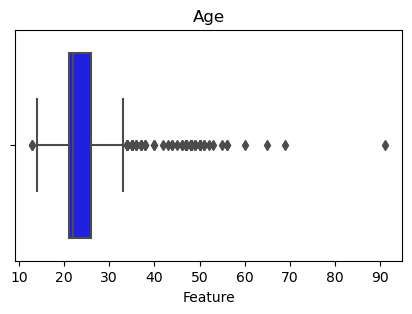

In [21]:
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed
sns.boxplot(x=data['Age'], color='blue')  # Replace 'Feature' with the name of your feature
plt.xlabel('Feature')
plt.title('Age')
plt.show()


In [22]:
# drop the outliear
data.drop(data.loc[data['Age'] > 91].index, inplace=True)

#### Data Visualisation

To begin, let's examine the data distribution concerning the time spent on social media for 471 participants.

<Axes: xlabel='Time Spent on Social Media', ylabel='Frequency'>

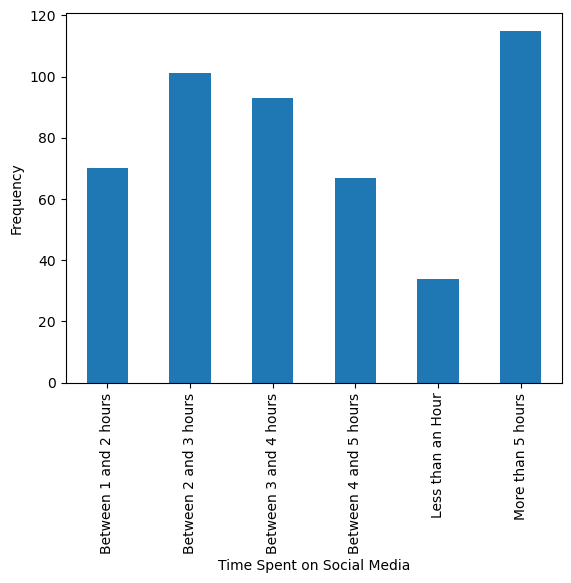

In [23]:
data.groupby('Time Spent').size().plot.bar(xlabel='Time Spent on Social Media', ylabel='Frequency')

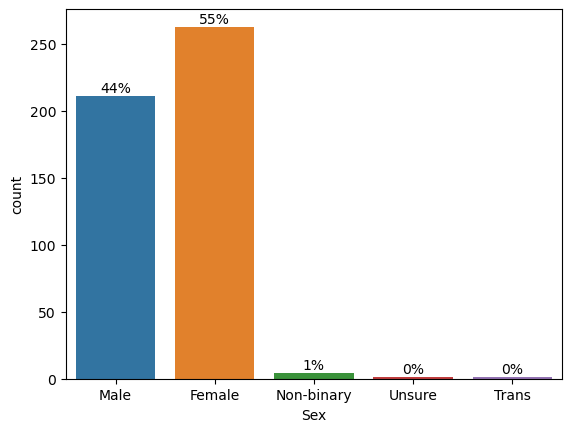

In [24]:
# Let's understand the distribution of data for 473 participants based on their Gender.

total=float(len(data))
ax = sns.countplot(x="Sex", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

C:\Anaconda\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


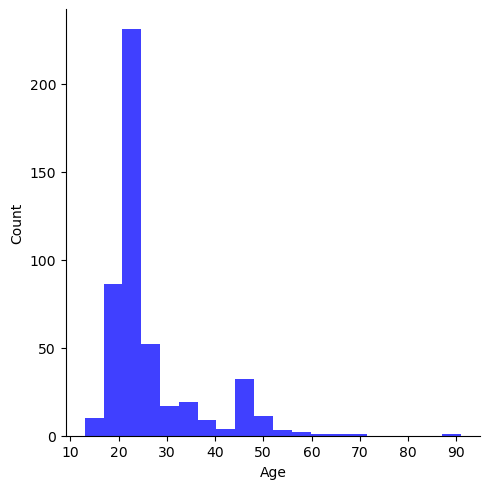

In [25]:
import seaborn as sns

sns.displot(data['Age'].dropna(), kde=False, color='blue', bins=20, edgecolor='None')
plt.show()


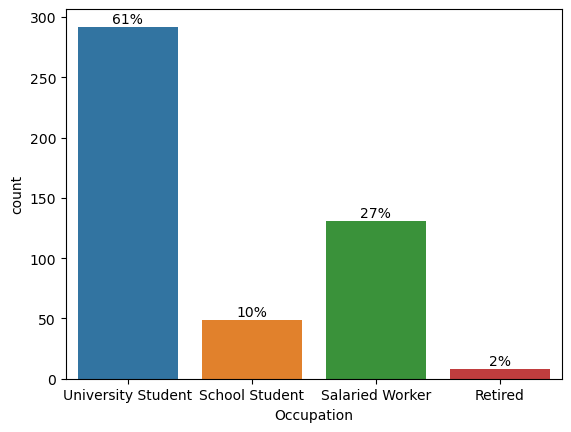

In [26]:
# Let's understand the distribution of data for 471 participants based on their Occupation.
total=float(len(data))
ax = sns.countplot(x="Occupation", data=data) 
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2,height + 3,'{0:.0%}'.format(height/total),ha="center")

In [27]:
#Let's see the mean target score of each Time group of participants

# Feature engineer the ADHD questions into one value
adhd_columns = ['Target 1', 'Target 2', 'Target 3']
data['Target'] = data[adhd_columns].mean(axis=1).round().astype(np.int64)


In [28]:
data.drop(columns=['Target 1', 'Target 2', 'Target 3'], inplace=True)

In [29]:
data.head(10)

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target
0,4/18/2022 19:18:47,21,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,2,2,5,2,3,5
1,4/18/2022 19:19:28,21,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,1,5,5,5,1,4
2,4/18/2022 19:25:59,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,1,5,4,3,3,3
3,4/18/2022 19:29:43,21,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,2,5,4,5,1,3
4,4/18/2022 19:33:31,21,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,3,5,4,3,3,4
5,4/18/2022 19:33:48,22,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,4,4,2,3,4,3,4,4,3
6,4/18/2022 19:36:12,21,Female,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",Between 3 and 4 hours,4,3,2,4,4,5,5,3,3
7,4/18/2022 19:36:17,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,3,5,1,3,3
8,4/18/2022 19:39:36,21,Female,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",More than 5 hours,5,2,3,1,1,5,1,3,3
9,4/18/2022 19:41:34,20,Male,Single,University Student,University,No,"Reddit, Pinterest",Less than an Hour,1,1,1,1,1,1,1,1,1


<Axes: xlabel='Time Spent', ylabel='Mean Target Score'>

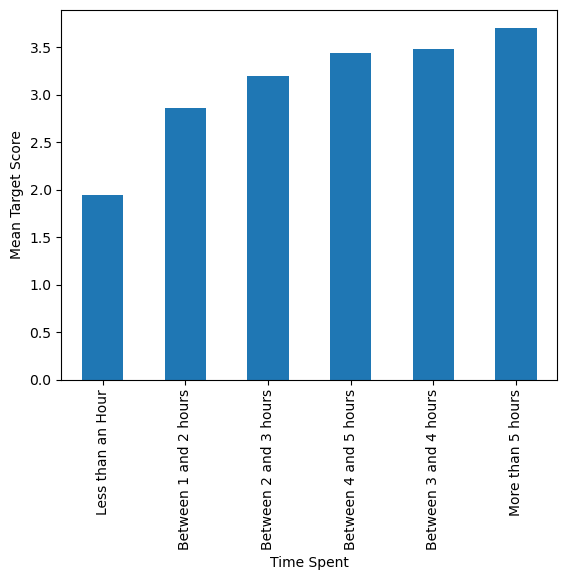

In [30]:
data.groupby('Time Spent')['Target'].mean().sort_values(ascending=True).plot.bar(ylabel='Mean Target Score')

#### Converting Time Spent category to Numerical Values

In [31]:
data.loc[data['Time Spent'] == 'Less than an Hour', 'Time Spent'] = 0
data.loc[data['Time Spent'] == 'Between 1 and 2 hours', 'Time Spent'] = 1
data.loc[data['Time Spent'] == 'Between 2 and 3 hours', 'Time Spent'] = 2
data.loc[data['Time Spent'] == 'Between 3 and 4 hours', 'Time Spent'] = 3
data.loc[data['Time Spent'] == 'Between 4 and 5 hours', 'Time Spent'] = 4
data.loc[data['Time Spent'] == 'More than 5 hours', 'Time Spent'] = 5

In [32]:
#Converting Time Spent from object type to int64.
data['Time Spent'] = data['Time Spent'].astype('int64')

#### Gender Variables to Numerical Values

In [33]:
#setting Male to 0, Female to 1, and Others to 2.
data.loc[data['Sex'] == 'Male', 'Sex'] = 0
data.loc[data['Sex'] == 'Female', 'Sex'] = 1
data.loc[data['Sex'] == 'Non-binary', 'Sex'] = 2
data.loc[data['Sex'] == 'Trans', 'Sex'] = 3
data.loc[data['Sex'] == 'Unsure', 'Sex'] = 4



In [34]:
data['Sex'] = data['Sex'].astype('int64')

In [35]:
data.head(40)

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target
0,4/18/2022 19:18:47,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,3,2,2,2,5,2,3,5
1,4/18/2022 19:19:28,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,4,3,2,1,5,5,5,1,4
2,4/18/2022 19:25:59,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,3,2,1,1,5,4,3,3,3
3,4/18/2022 19:29:43,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,4,2,1,2,5,4,5,1,3
4,4/18/2022 19:33:31,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,3,5,4,3,5,4,3,3,4
5,4/18/2022 19:33:48,22,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,4,4,2,3,4,3,4,4,3
6,4/18/2022 19:36:12,21,1,Married,University Student,University,Yes,"Facebook, Instagram, YouTube, Snapchat, TikTok",3,4,3,2,4,4,5,5,3,3
7,4/18/2022 19:36:17,21,1,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",5,5,2,3,1,3,5,1,3,3
8,4/18/2022 19:39:36,21,1,In a relationship,University Student,University,Yes,"Facebook, Instagram, YouTube",5,5,2,3,1,1,5,1,3,3
9,4/18/2022 19:41:34,20,0,Single,University Student,University,No,"Reddit, Pinterest",0,1,1,1,1,1,1,1,1,1


#### Correlation Plot and Heatmap

In [36]:
data_new = data.drop(['Timestamp','Relationship Status', 'Occupation', 'Affiliations', 'Social Media User?', 'Platforms Used'], inplace = False, axis = 1)

data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 0 to 480
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         480 non-null    int64
 1   Sex         480 non-null    int64
 2   Time Spent  480 non-null    int64
 3   Q1          480 non-null    int64
 4   Q2          480 non-null    int64
 5   Q3          480 non-null    int64
 6   Q4          480 non-null    int64
 7   Q5          480 non-null    int64
 8   Q6          480 non-null    int64
 9   Q7          480 non-null    int64
 10  Q8          480 non-null    int64
 11  Target      480 non-null    int64
dtypes: int64(12)
memory usage: 48.8 KB


In [37]:
data_new.corr()

,Age,Sex,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target
Age,1.000000,-0.118963,-0.361333,-0.224916,-0.231384,-0.124569,-0.039331,-0.291707,-0.306162,-0.092456,0.019057,-0.276861
Sex,-0.118963,1.000000,0.215544,0.064496,0.083389,0.121420,0.058629,0.119604,0.132983,0.119060,-0.068275,0.147820
Time Spent,-0.361333,0.215544,1.000000,0.393191,0.378661,0.397034,0.110442,0.333709,0.336852,0.200647,0.047960,0.374217
Q1,-0.224916,0.064496,0.393191,1.000000,0.463131,0.358841,0.144875,0.254884,0.317977,0.148129,0.086795,0.382554
Q2,-0.231384,0.083389,0.378661,0.463131,1.000000,0.511107,0.271599,0.350614,0.385813,0.288675,0.075236,0.594494
Q3,-0.124569,0.121420,0.397034,0.358841,0.511107,1.000000,0.248377,0.357884,0.338191,0.321737,0.130233,0.528313
Q4,-0.039331,0.058629,0.110442,0.144875,0.271599,0.248377,1.000000,0.208223,0.271693,0.417483,0.154696,0.275494
Q5,-0.291707,0.119604,0.333709,0.254884,0.350614,0.357884,0.208223,1.000000,0.585842,0.416538,0.025556,0.560074
Q6,-0.306162,0.132983,0.336852,0.317977,0.385813,0.338191,0.271693,0.585842,1.000000,0.419531,0.039805,0.560290
Q7,-0.092456,0.119060,0.200647,0.148129,0.288675,0.321737,0.417483,0.416538,0.419531,1.000000,-0.011774,0.398122


C:\Anaconda\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Anaconda\Anaconda\envs\tensorflow\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

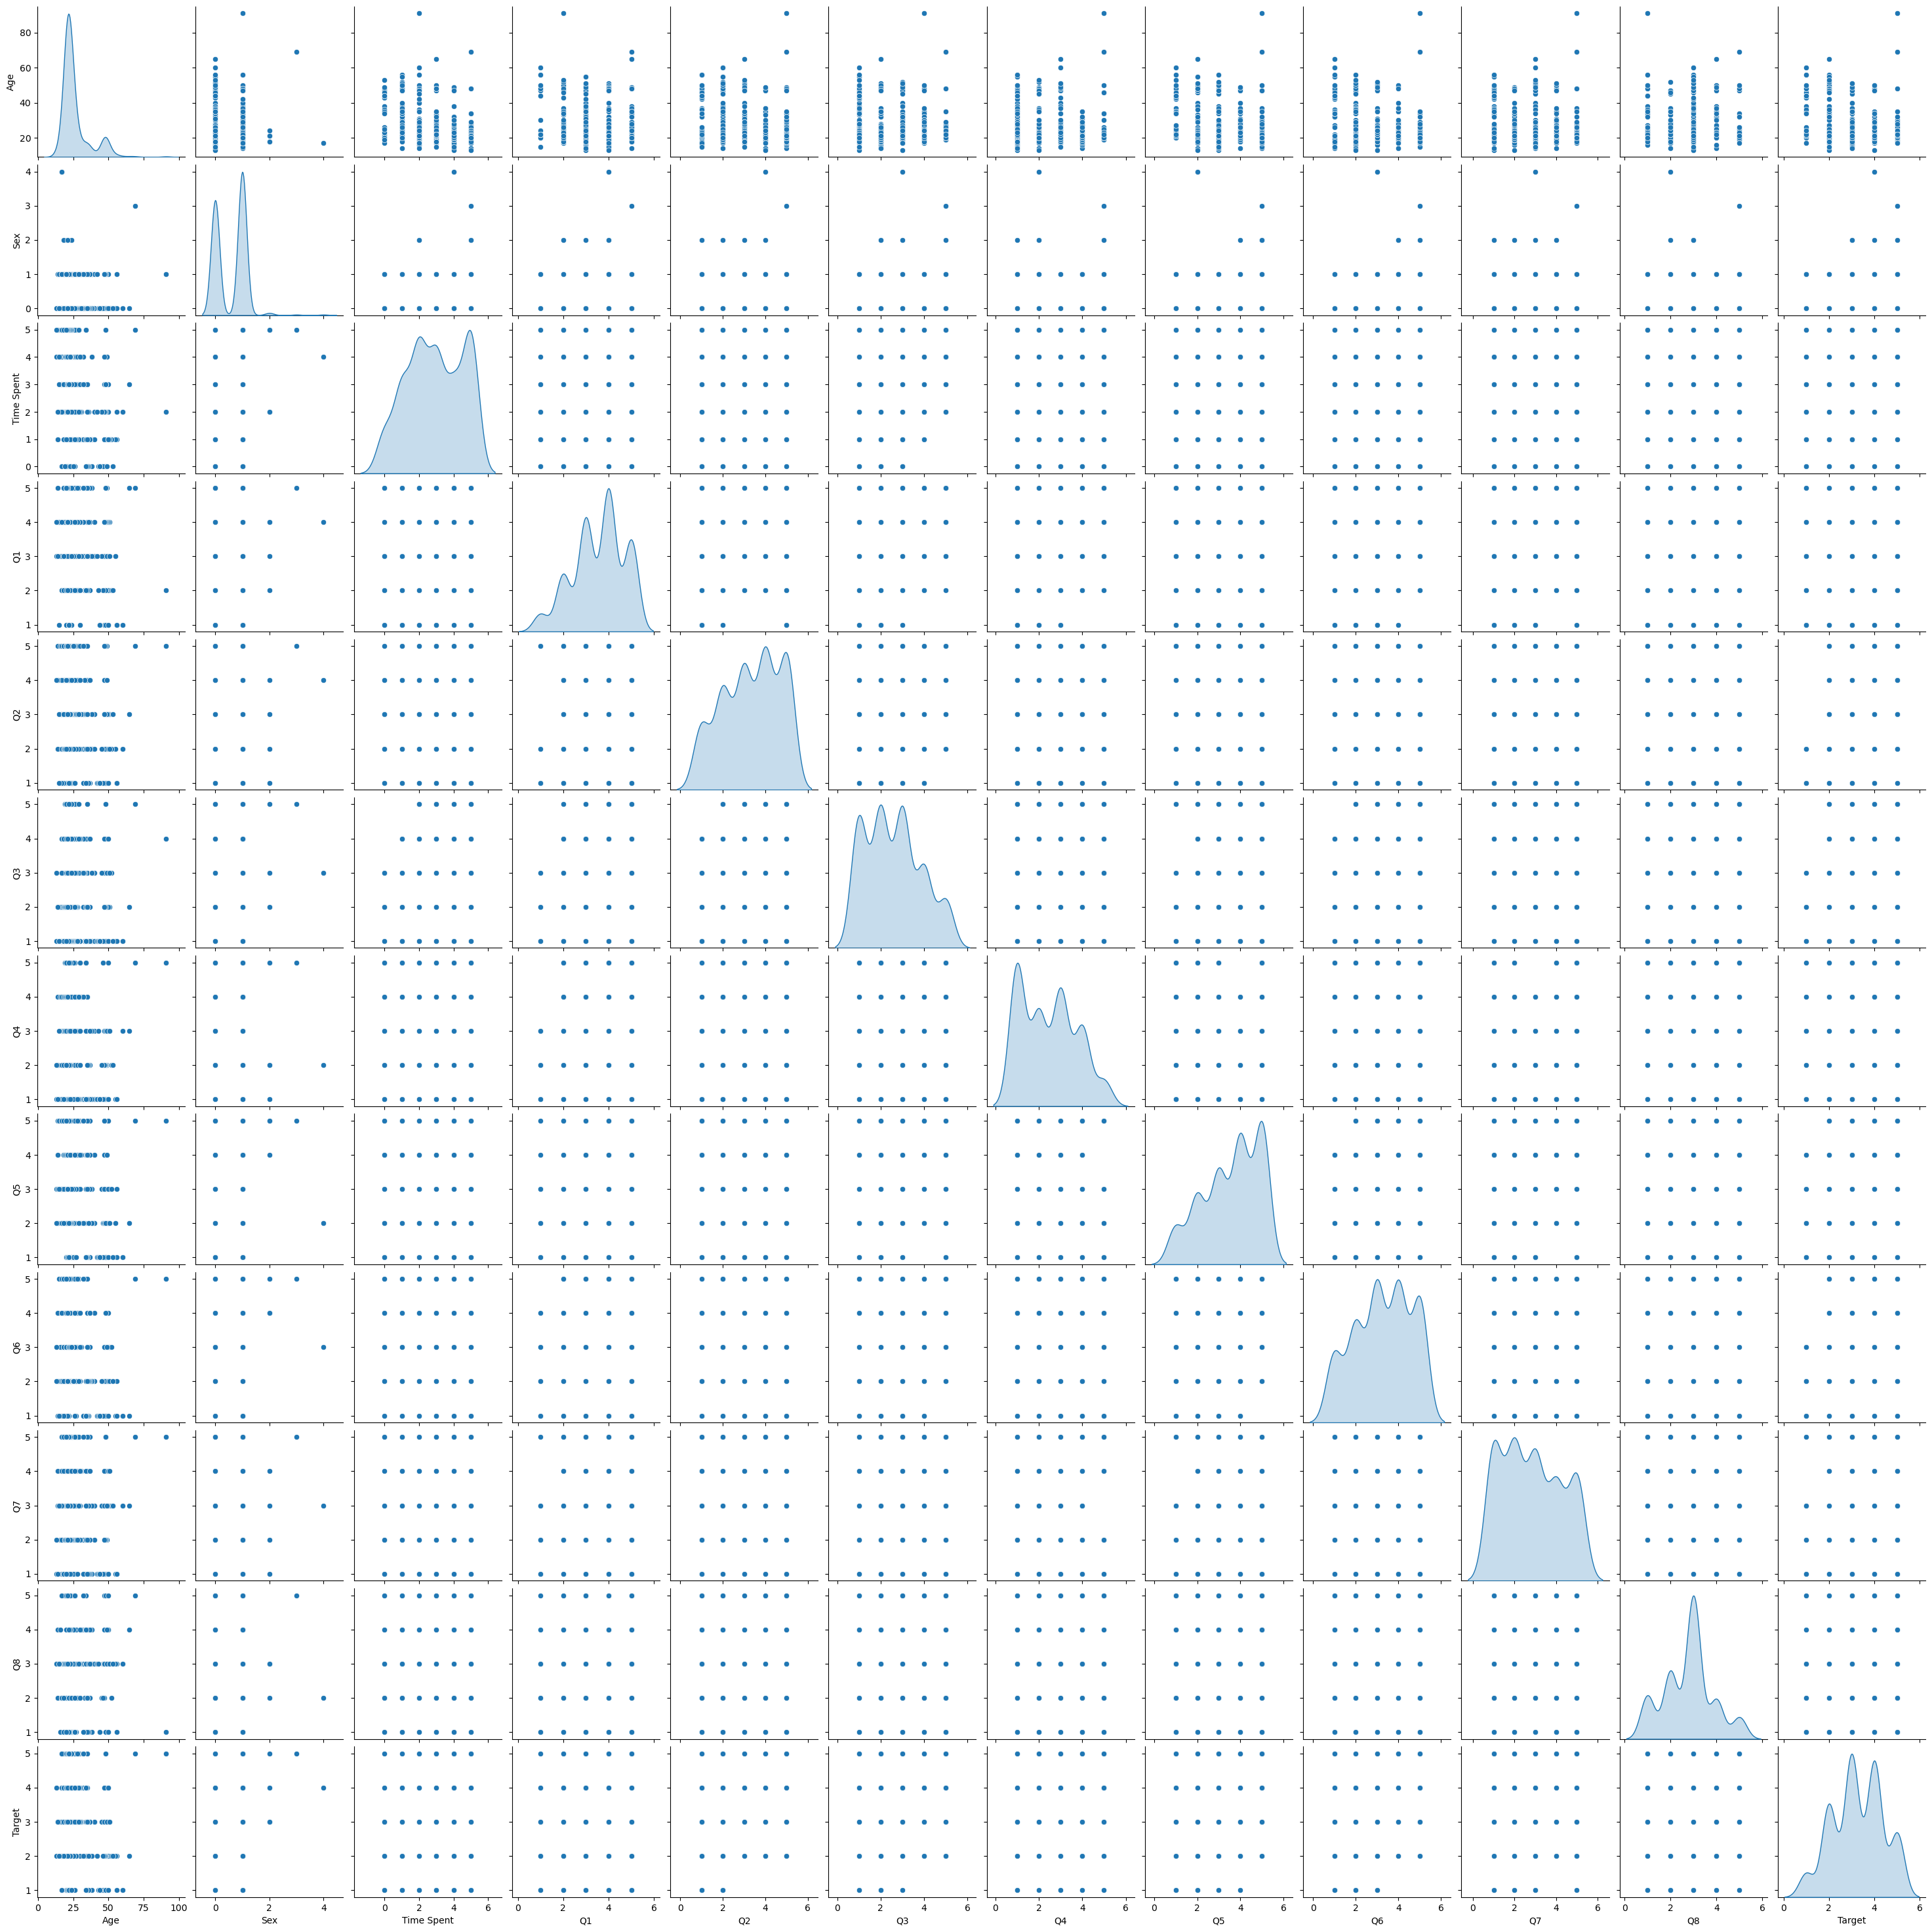

In [38]:
sns.pairplot(data,diag_kind='kde')


<Axes: >

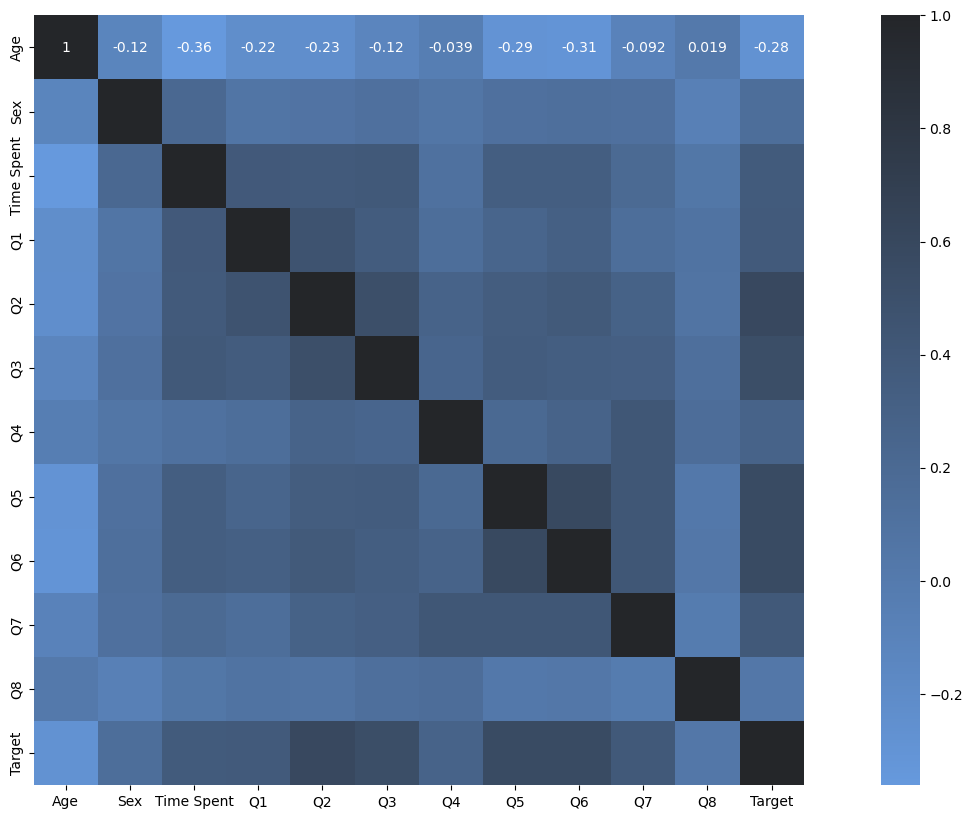

In [39]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data_new.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), cmap=sns.dark_palette("#69d", reverse=True, as_cmap=True),
            square=True, ax=ax,annot=True)

In [40]:
data.head()

,Timestamp,Age,Sex,Relationship Status,Occupation,Affiliations,Social Media User?,Platforms Used,Time Spent,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Target
0,4/18/2022 19:18:47,21,0,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2,5,3,2,2,2,5,2,3,5
1,4/18/2022 19:19:28,21,1,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5,4,3,2,1,5,5,5,1,4
2,4/18/2022 19:25:59,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",3,3,2,1,1,5,4,3,3,3
3,4/18/2022 19:29:43,21,1,Single,University Student,University,Yes,"Facebook, Instagram",5,4,2,1,2,5,4,5,1,3
4,4/18/2022 19:33:31,21,1,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",2,3,5,4,3,5,4,3,3,4


In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Drop the timestamp column
if 'Timestamp' in data.columns:
    data.drop('Timestamp', axis=1, inplace=True)


# Encode categorical variables
label_encoders = {}
for column in ['Age', 'Sex', 'Relationship Status', 'Occupation', 'Affiliations', 'Social Media User?', 'Platforms Used']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Separate features and target
X = data.drop('Target', axis=1)
y = data['Target']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode the target variable to make it suitable for classification
y = LabelEncoder().fit_transform(y)

# Convert target to categorical (one-hot encoding)
y = tf.keras.utils.to_categorical(y, num_classes=5)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Build the model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dense(5, activation='softmax'))  # 5 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/50
10/10 [==============================] - 1s 30ms/step - loss: 1.8417 - accuracy: 0.1792 - val_loss: 1.6676 - val_accuracy: 0.1948
Epoch 2/50
10/10 [==============================] - 0s 9ms/step - loss: 1.7230 - accuracy: 0.2182 - val_loss: 1.6218 - val_accuracy: 0.2857
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 1.6839 - accuracy: 0.1889 - val_loss: 1.5897 - val_accuracy: 0.2597
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 1.6229 - accuracy: 0.2443 - val_loss: 1.5694 - val_accuracy: 0.3247
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 1.5552 - accuracy: 0.2476 - val_loss: 1.5517 - val_accuracy: 0.3506
Epoch 6/50
10/10 [==============================] - 0s 6ms/step - loss: 1.5372 - accuracy: 0.2313 - val_loss: 1.5355 - val_accuracy: 0.3506
Epoch 7/50
10/10 [==============================] - 0s 7ms/step - loss: 1.5051 - accuracy: 0.3160 - val_loss: 1.5207 - val_accuracy: 0.3247
Epoch 8/50
10/10 [=

In [62]:
def display_expected_values():
    expected_values = {}
    for column, le in label_encoders.items():
        expected_values[column] = le.classes_
    return expected_values

expected_values = display_expected_values()
print(expected_values)

def preprocess_user_input(user_input):
    # Encode categorical variables
    for column in ['Sex', 'Relationship Status', 'Occupation', 'Affiliations', 'Social Media User?', 'Platforms Used']:
        if user_input[column] in label_encoders[column].classes_:
            user_input[column] = label_encoders[column].transform([user_input[column]])[0]
        else:
            raise ValueError(f"Unexpected value '{user_input[column]}' for column '{column}'")

    # Convert to DataFrame
    input_df = pd.DataFrame([user_input])
    
    # Scale the features
    input_scaled = scaler.transform(input_df)
    
    return input_scaled


{'Age': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64), 'Sex': array([0, 1, 2, 3, 4], dtype=int64), 'Relationship Status': array([0, 1, 2, 3], dtype=int64), 'Occupation': array([0, 1, 2, 3], dtype=int64), 'Affiliations': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18], dtype=int64), 'Social Media User?': array([0, 1], dtype=int64), 'Platforms Used': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
      

In [60]:
def predict_user_input(user_input):
    input_scaled = preprocess_user_input(user_input)
    prediction = model.predict(input_scaled)
    predicted_class = np.argmax(prediction, axis=1)[0]
    return predicted_class + 1  # Assuming classes are 1 to 5


In [66]:
# Example user input
user_input = {
    'Age': 25,
    'Sex': 0,
    'Relationship Status': 0,
    'Occupation': 0,
    'Affiliations': 0,
    'Social Media User?': 0,
    'Platforms Used': 1,
    'Time Spent': 120,
    'Q1': 4,
    'Q2': 3,
    'Q3': 5,
    'Q4': 2,
    'Q5': 4,
    'Q6': 3,
    'Q7': 5,
    'Q8': 2
}


try:
    predicted_output = predict_user_input(user_input)
    print(f'The predicted class for the given input is: {predicted_output}')
except ValueError as e:
    print(e)


1/1 [==============================] - 0s 54ms/step
The predicted class for the given input is: 4
